In [1]:
import sys
import os
sys.path.insert(0, os.getcwd()+"/Utils")
import PolyTurk as pt
TRIAL_ID = 5
MASK_PATH = '/home/andrew/ImageSegmentation/Training/Trial'+str(TRIAL_ID)+'/masks/'
IMG_PATH = '/home/andrew/ImageSegmentation/Training/Raw_Images_1024/'

trial_inputs = {
    'TRIAL_ID': TRIAL_ID,
    'MASK_PATH': MASK_PATH,
    'IMG_PATH': IMG_PATH
}

## Initialize Turk object

In [82]:
turk = pt.Turk(trial_inputs)

Number of HITs: 59
Reviewable Assignments: 4


In [83]:
trial_data = turk.getTaskData()

In [15]:
turk.Overwrite=True
turk.getTaskData()

[{'Mask_Name': 'SemImage178_ACNLR.png',
  'Image_ID': '178',
  'AssignmentID': '3K9FOBBF2HJ22ZQNUQOFY2UI3ACNLR',
  'Worker': 'A2F9FURICZCOY3',
  'Answer': [{'label': 'Nucleus',
    'vertices': [{'x': 704, 'y': 597},
     {'x': 672, 'y': 601},
     {'x': 617, 'y': 601},
     {'x': 544, 'y': 607},
     {'x': 505, 'y': 598},
     {'x': 483, 'y': 585},
     {'x': 473, 'y': 561},
     {'x': 483, 'y': 540},
     {'x': 514, 'y': 525},
     {'x': 558, 'y': 517},
     {'x': 610, 'y': 516},
     {'x': 661, 'y': 513},
     {'x': 691, 'y': 518},
     {'x': 716, 'y': 526},
     {'x': 732, 'y': 540},
     {'x': 736, 'y': 566},
     {'x': 726, 'y': 583}]},
   {'label': 'Nucleus',
    'vertices': [{'x': 570, 'y': 677},
     {'x': 610, 'y': 668},
     {'x': 639, 'y': 663},
     {'x': 656, 'y': 659},
     {'x': 667, 'y': 646},
     {'x': 659, 'y': 628},
     {'x': 628, 'y': 614},
     {'x': 582, 'y': 616},
     {'x': 526, 'y': 623},
     {'x': 495, 'y': 628},
     {'x': 466, 'y': 645},
     {'x': 464, '

## Preview Results

In [84]:
import pandas as pd
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import base64

pd.set_option('display.max_colwidth', -1)

def get_thumbnail(paths):
    bg = Image.open(paths[0])
    fg = Image.open(paths[1])
    bg.paste(fg, (0, 0), bg)
    bg.thumbnail((150, 150), Image.LANCZOS)
    return bg

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

df = pd.DataFrame(trial_data)
df = df.drop(columns=['Answer'], axis=1)


#qgrid_widget = qgrid.show_grid(df.groupby('Worker'), show_toolbar=True)
#qgrid_widget
dfworker = df.groupby(['Worker','AssignmentID'])
dfworker.first()

import qgrid
qgrid_widget=qgrid.show_grid(dfworker.first(),show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

,Worker,Preview,Score,Approved
0,A2F9FURICZCOY3,,10,False
1,A2F9FURICZCOY3,,10,False
2,ADZTRHMSO0F7N,,10,False
3,A2F9FURICZCOY3,,10,False

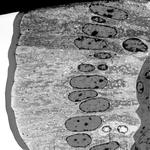
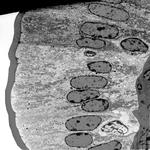
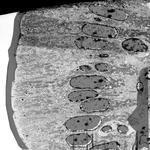
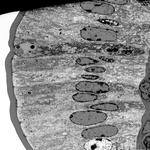

In [85]:
import pandas as pd
df = pd.DataFrame(trial_data)
df['URLs'] = df[['Image_Path', 'Mask_Path']].values.tolist()
df['Preview'] = df.URLs.map(lambda f: get_thumbnail(f))
#df.sort_values(by=['Worker'])
#df.pivot(index='Worker', columns='Image_ID', values='Avg_Poly_Verts')
HTML(df[['Worker', 'Preview','Score','Approved']].to_html(formatters={'Preview': image_formatter}, escape=False))
#df

In [ ]:
df